# Synaptic Partner Prediction in FAFB

Example notebook of how to use synfulcircuit library to analyze synapses stored in a database. Thie notebook uses  synaptic partner predictions from Buhmann et al. 2019 and neuron
segmentation from Li et al. 2019.

November 2019, Stephan Gerhard <info@braincircuits.io> (Modified by Julia Buhmann - December 2019 and May 2020)

### Prerequisites

* Download the SQLite database dump of all synaptic partner predictions and store it locally:
    * [download link](https://cremi.org/static/data/20191211_fafbv14_buhmann2019_li20190805.db) (14 gb, 244 million putative synaptic links)

In [15]:
from synfulcircuit import QueryCircuit, visualization
import logging

logging.basicConfig(level=logging.INFO) # Change INFO to DEBUG to increase verbosity

synaptic_predictions_dump_fname ='' # Put here the path to the downloaded file
# Parameter for neuroglancer visualization
ng_jsonstate = 'configs/fafb_viewer_state_neuropil.json'
ng_seglayer = 'fafb-ffn1-20190805'

circuit =  QueryCircuit(synaptic_predictions_dump_fname)

## Select a neuron segment
You can leave the template segmentation id here, or choose a new one in neuroglancer


In [9]:
seg_ids = [7629661774, 7889893021, 2906239892] # some interesting seg ids to look at in neuroglancer

seg_id = 7629661774
visualization.ng_link(seg_ids, ng_jsonstate, ng_seglayer)

## Plot input output sites of selected neuron segment
For many neurons, you will find a dendritic part of the neuron (colored in blue) and an axonic part of the neuron (colored in red).

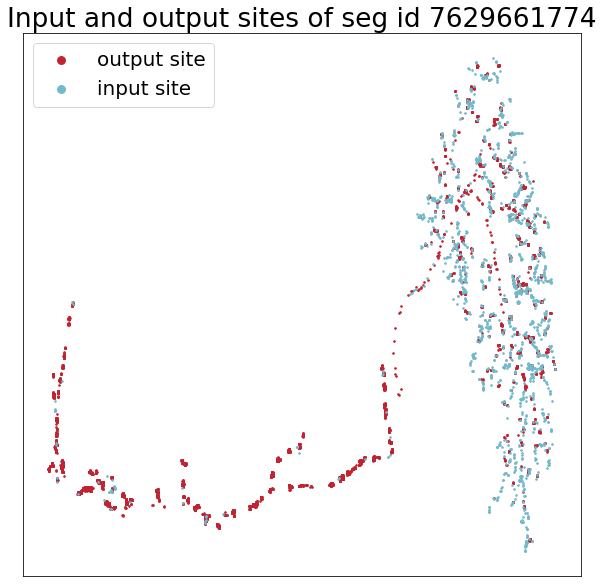

In [10]:
links = circuit.get_synaptic_links(seg_id)
visualization.plot_input_output_sites(links, seg_id)

## Retrieve down and upstream neuron segments

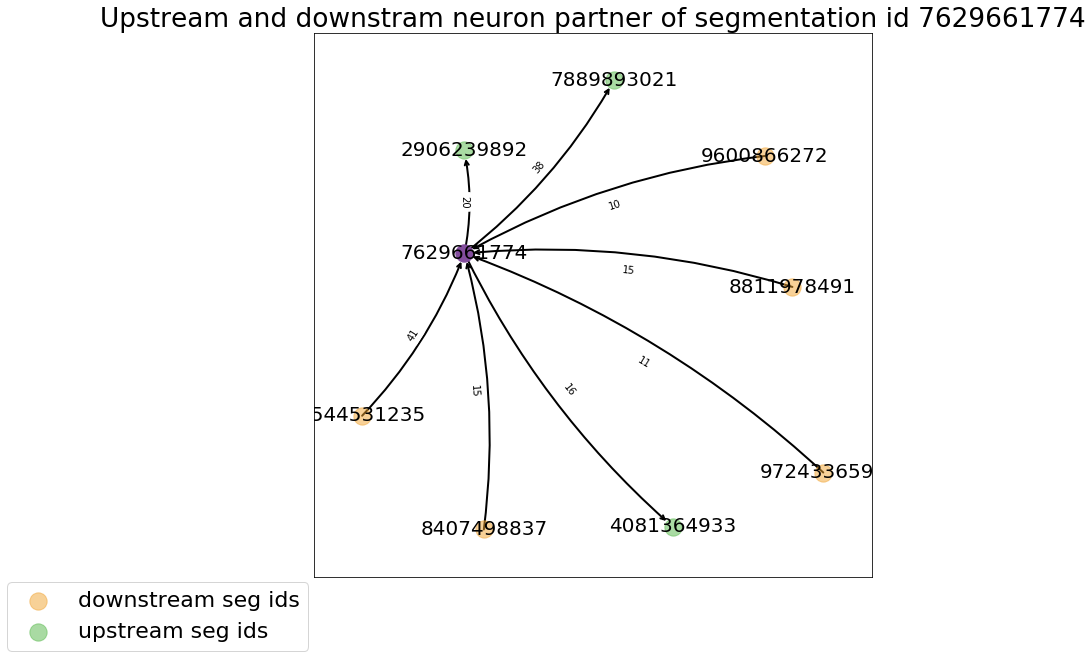

In [11]:
weight_threshold = 10
nxg = circuit.links_to_nx([seg_id], weight_threshold=weight_threshold)
visualization.plot_up_downstream_subcircuit(nxg, seg_id, add_node_ids=True)

### Example: Visualize downstream neurons in neuroglancer

In [12]:
down_segids = circuit.get_downstream_partners(seg_id, weight_threshold=weight_threshold)
seg_ids = down_segids + [seg_id]
visualization.ng_link(seg_ids, ng_jsonstate, ng_seglayer)

## Explore the first-order circuit of a given segment

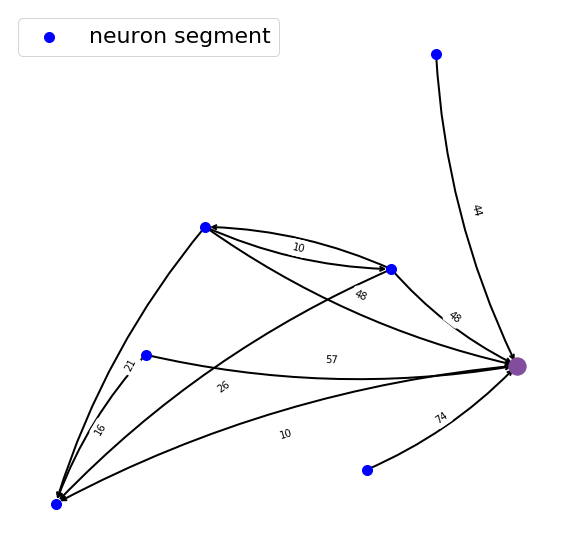

In [13]:
seg_id = 2906239892
weight_threshold = 10
circuit =  QueryCircuit(synaptic_predictions_dump_fname)
down_segids = circuit.get_downstream_partners(seg_id, weight_threshold=weight_threshold)
up_segids = circuit.get_upstream_partners(seg_id, weight_threshold=weight_threshold)
seg_ids = down_segids + up_segids + [seg_id]

# Plot a circuit with all up-and downstream neuron partners and their respective connections
nxg = circuit.links_to_nx(seg_ids, weight_threshold=weight_threshold)
visualization.plot_circuit(nxg, seg_ids=seg_ids, color_node_ids=[seg_id])

### Visualize neuron segments of circuit in neuroglancer

In [14]:
visualization.ng_link(seg_ids, ng_jsonstate, ng_seglayer)